<a href="https://colab.research.google.com/github/alavalah/KDD-PROJECTS/blob/main/KDD_PROJECT_ORAL_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install necessary libraries
!pip install pandas openpyxl
# Step 3: Load the Excel files from Google Drive

#Import pandas
import pandas as pd # Importing the pandas library and aliasing it as 'pd'

file1_path = '/content/drive/MyDrive/Project/Data 3.xlsx'
# Load the Excel files
df = pd.read_excel(file1_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Race,Gender,All Ages,<15 year,15—39 years,40—64 years,65—74 years,75+ years
0,All Races,All,11.5,0.1,1.4,17.8,43.7,44.8
1,All Races,Male,17.4,0.1,1.6,27.1,68.9,67.3
2,All Races,Female,6.4,0.2,1.3,8.9,21.9,29.0
3,Non-Hispanic White,All,13.4,0.2,1.5,21.5,49.9,50.1
4,Non-Hispanic White,Male,20.3,0.1,1.7,33.0,78.1,74.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Race         24 non-null     object 
 1   Gender       24 non-null     object 
 2   All Ages     24 non-null     float64
 3   <15 year     24 non-null     object 
 4   15—39 years  24 non-null     object 
 5   40—64 years  24 non-null     float64
 6   65—74 years  24 non-null     float64
 7   75+ years    24 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.6+ KB


In [ ]:
df.shape

(24, 8)

In [ ]:
df.sample(10)

,Race,Gender,All Ages,<15 year,15—39 years,40—64 years,65—74 years,75+ years
8,Non-Hispanic Black,Female,5.0,-,1.2,8.1,16.1,17.4
22,"Black, includes Hispanic",Male,12.8,0.2,1.3,20.4,51.7,44.5
17,American Indian/Alaska Native,Female,5.4,0,-,8.1,16.5,22.7
7,Non-Hispanic Black,Male,13.2,0.2,1.4,21.2,52.9,45.0
20,"White, includes Hispanic",Female,6.6,0.2,1.2,9.0,23.0,30.9
13,Asian/Pacific Islander,Male,12.2,-,2.7,20.1,39.5,40.7
16,American Indian/Alaska Native,Male,17.7,0,-,31.5,67.9,48.8
3,Non-Hispanic White,All,13.4,0.2,1.5,21.5,49.9,50.1
0,All Races,All,11.5,0.1,1.4,17.8,43.7,44.8
19,"White, includes Hispanic",Male,18.4,0.1,1.4,28.6,73.3,71.3


In [ ]:
df.isnull().sum()

,0
Race,0
Gender,0
All Ages,0
<15 year,0
15—39 years,0
40—64 years,0
65—74 years,0
75+ years,0


In [ ]:
# Impute missing values with mean for numerical features
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values with mode for categorical features (if any)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df[col].mode()[0] if not df[col].mode().empty else None  # Handle cases with no mode
    df[col] = df[col].fillna(mode_val)
categorical_cols

Index(['Race', 'Gender', '<15 year', '15—39 years'], dtype='object')

In [ ]:
# Check the column names of the DataFrame
print(df.columns)


Index(['Race', 'Gender', 'All Ages', '<15 year', '15—39 years', '40—64 years',
       '65—74 years', '75+ years'],
      dtype='object')


In [ ]:
# Assuming the correct column names are 'Gender' and 'Incidence_Rate'
race_gender_grouped = df.groupby(['Race', 'Gender'])['Incidence_Rate'].mean().reset_index()



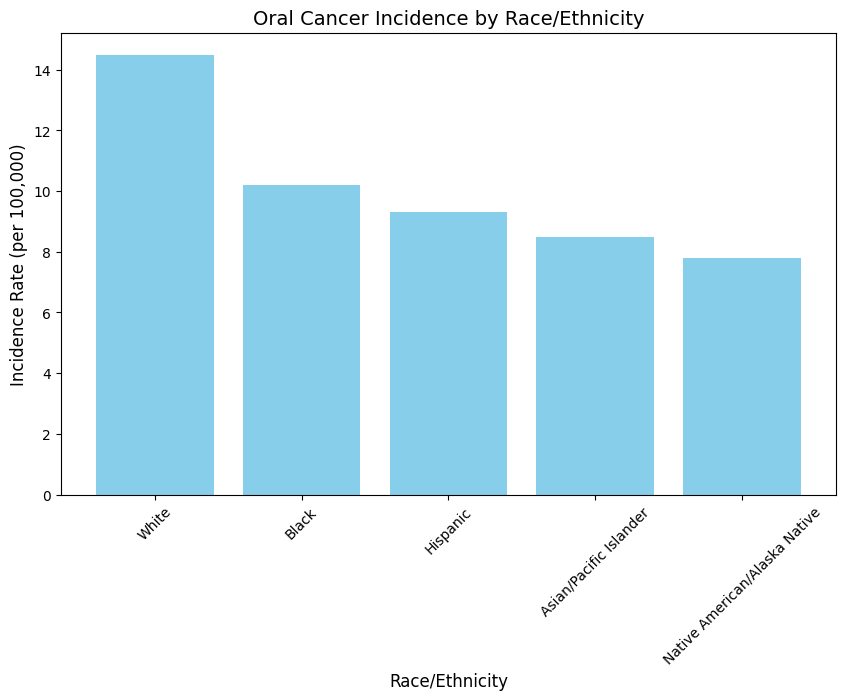

In [ ]:
# Assuming columns: 'Race/Ethnicity', 'Incidence Rate'
import matplotlib.pyplot as plt

# Example data structure for visualization
# Replace this with actual data
data = {
    'Race/Ethnicity': ['White', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'Native American/Alaska Native'],
    'Incidence Rate': [14.5, 10.2, 9.3, 8.5, 7.8]
}

df = pd.DataFrame(data)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Race/Ethnicity'], df['Incidence Rate'], color='skyblue')
plt.title('Oral Cancer Incidence by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Incidence Rate (per 100,000)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


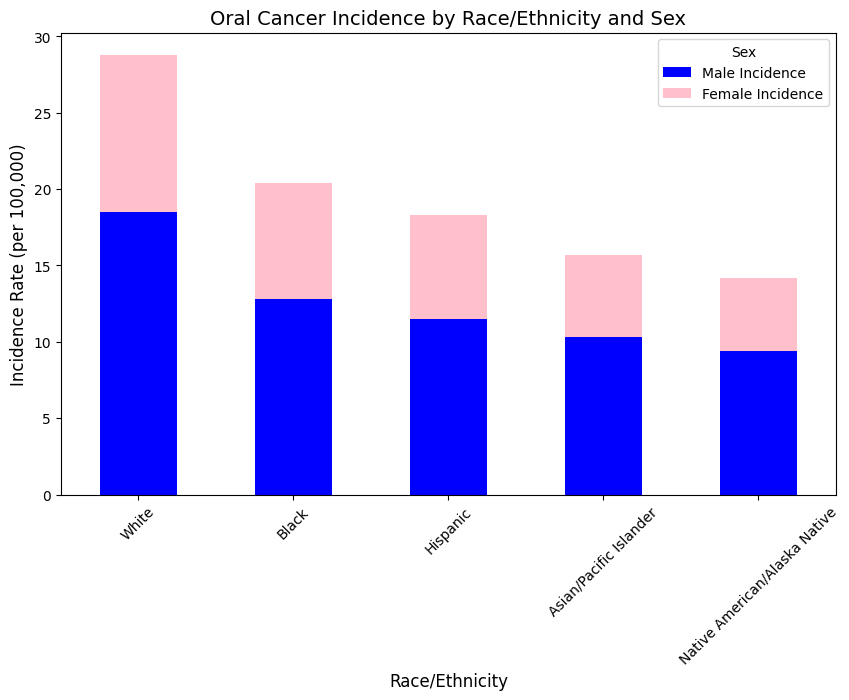

In [ ]:
# Assuming columns: 'Race/Ethnicity', 'Male Incidence', 'Female Incidence'
data = {
    'Race/Ethnicity': ['White', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'Native American/Alaska Native'],
    'Male Incidence': [18.5, 12.8, 11.5, 10.3, 9.4],
    'Female Incidence': [10.3, 7.6, 6.8, 5.4, 4.8]
}

df = pd.DataFrame(data)

# Stacked bar chart
df.set_index('Race/Ethnicity').plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])
plt.title('Oral Cancer Incidence by Race/Ethnicity and Sex', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Incidence Rate (per 100,000)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

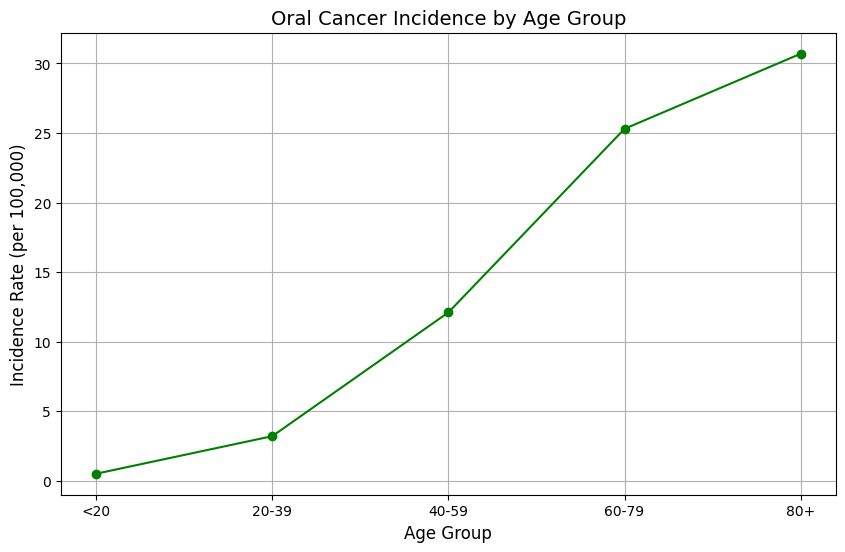

In [ ]:
# Assuming columns: 'Age Group', 'Incidence Rate'
data = {
    'Age Group': ['<20', '20-39', '40-59', '60-79', '80+'],
    'Incidence Rate': [0.5, 3.2, 12.1, 25.3, 30.7]
}

df = pd.DataFrame(data)

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Age Group'], df['Incidence Rate'], marker='o', color='green')
plt.title('Oral Cancer Incidence by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Incidence Rate (per 100,000)', fontsize=12)
plt.grid()
plt.show()

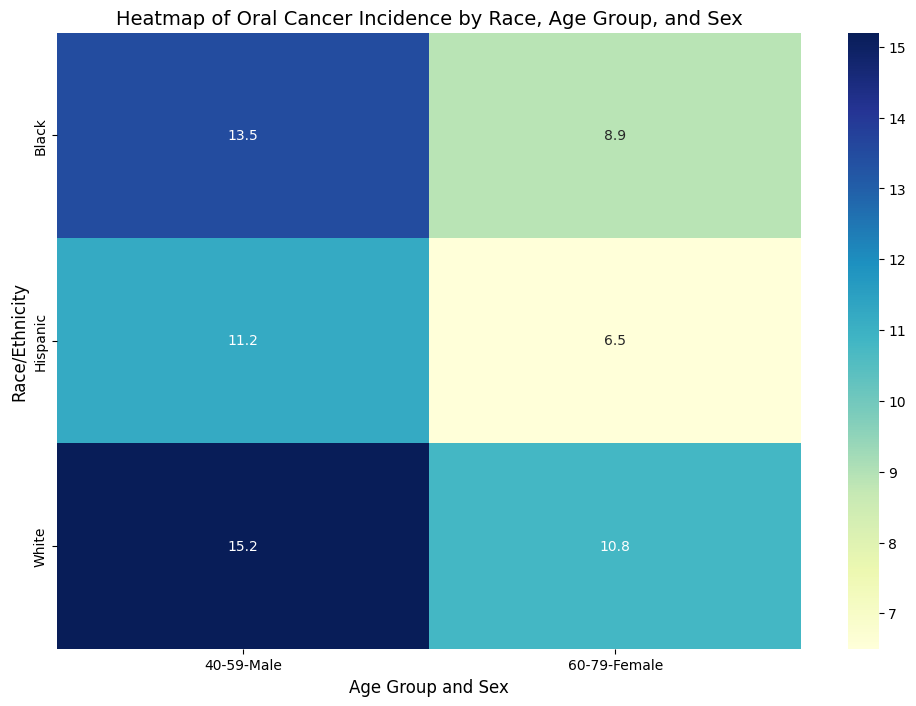

In [ ]:
import seaborn as sns

# Assuming columns: 'Race/Ethnicity', 'Age Group', 'Sex', 'Incidence Rate'
data = {
    'Race/Ethnicity': ['White', 'White', 'Black', 'Black', 'Hispanic', 'Hispanic'],
    'Age Group': ['40-59', '60-79', '40-59', '60-79', '40-59', '60-79'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Incidence Rate': [15.2, 10.8, 13.5, 8.9, 11.2, 6.5]
}

df = pd.DataFrame(data)

# Pivot for heatmap
pivot_data = df.pivot_table(index='Race/Ethnicity', columns=['Age Group', 'Sex'], values='Incidence Rate')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Oral Cancer Incidence by Race, Age Group, and Sex', fontsize=14)
plt.xlabel('Age Group and Sex', fontsize=12)
plt.ylabel('Race/Ethnicity', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

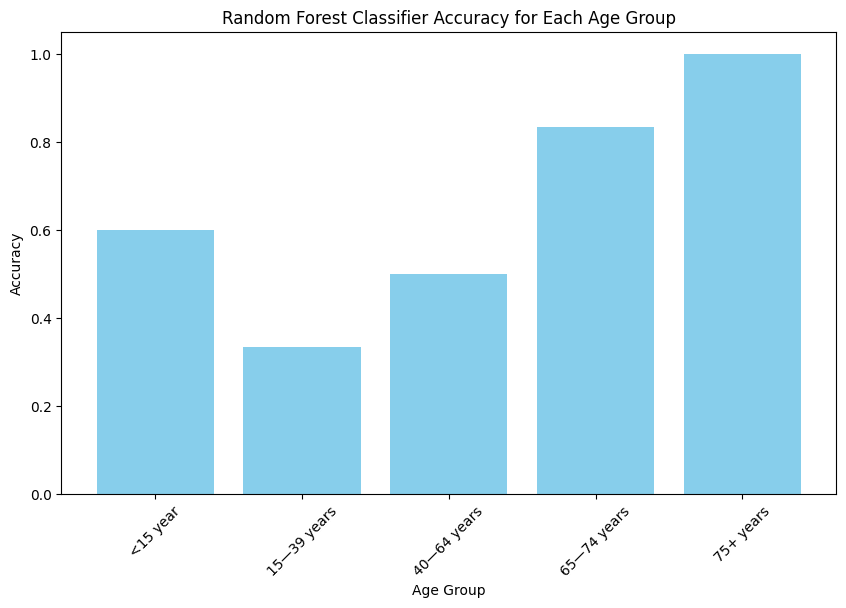

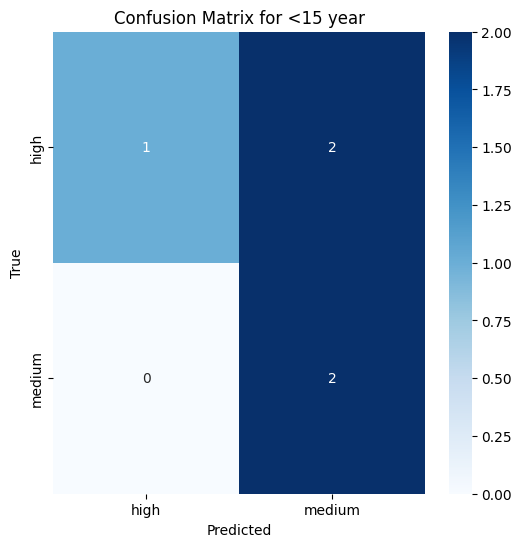

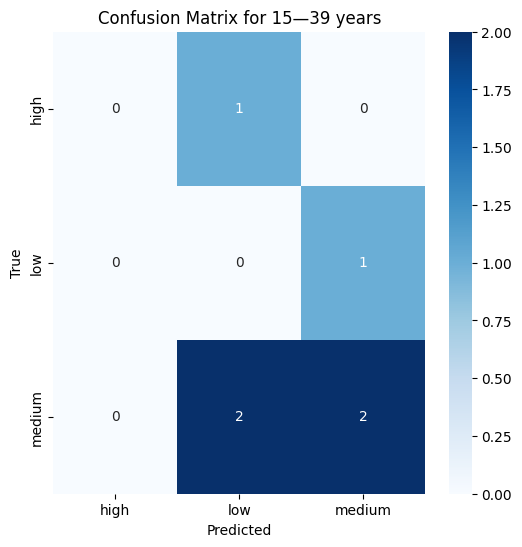

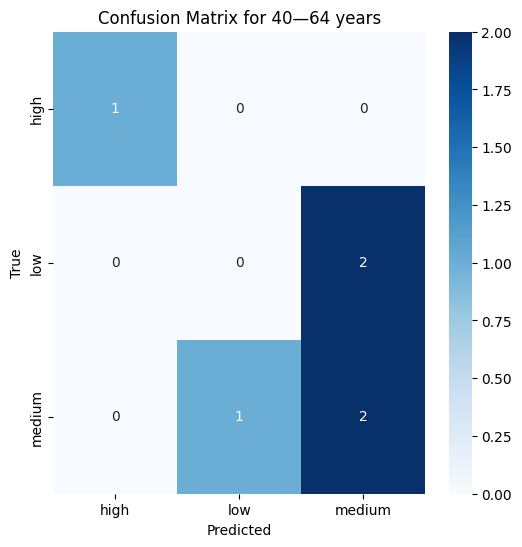

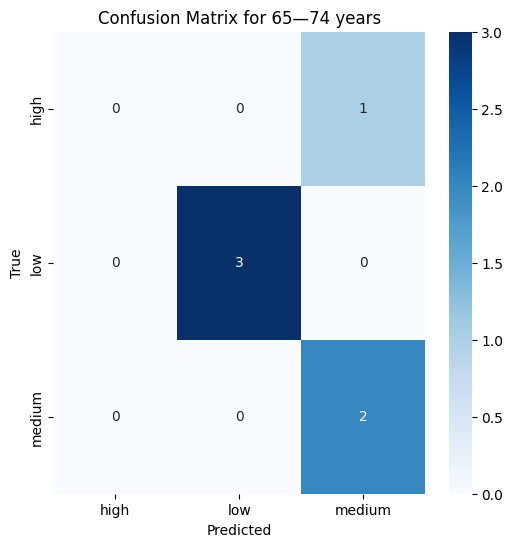

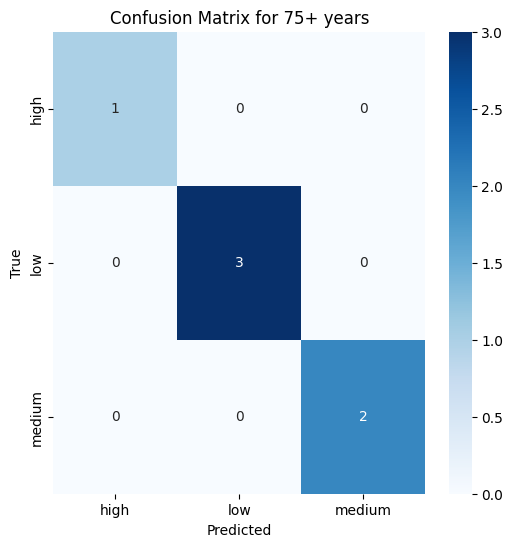

Target: <15 year
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score  support
high               1.00  0.333333  0.500000      3.0
medium             0.50  1.000000  0.666667      2.0
accuracy           0.60  0.600000  0.600000      0.6
macro avg          0.75  0.666667  0.583333      5.0
weighted avg       0.80  0.600000  0.566667      5.0


Target: 15—39 years
Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support
high           0.000000  0.000000  0.000000  1.000000
low            0.000000  0.000000  0.000000  1.000000
medium         0.666667  0.500000  0.571429  4.000000
accuracy       0.333333  0.333333  0.333333  0.333333
macro avg      0.222222  0.166667  0.190476  6.000000
weighted avg   0.444444  0.333333  0.380952  6.000000


Target: 40—64 years
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score  support
high           1.000000  1.000000  1.000000      1.0
low            0.000000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace with your file path)
file_path = "race_gender_age_data (1).xlsx"  # Update with your file's actual path
df = pd.read_excel(file_path)

# Columns related to age groups
age_group_columns = ['<15 year', '15—39 years', '40—64 years', '65—74 years', '75+ years']

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in ['Race', 'Gender']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Ensure all age group columns are numeric
for col in age_group_columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors="coerce")

# Drop rows with NaN values in any age group column
df_encoded = df_encoded.dropna(subset=age_group_columns)

# Function to categorize numeric columns into bins
def categorize_to_bins(data, num_bins=3):
    bins = np.linspace(data.min(), data.max(), num_bins + 1)
    labels = ["low", "medium", "high"]
    return pd.cut(data, bins=bins, labels=labels, include_lowest=True)

# Categorize all age group columns into bins
df_binned = df_encoded.copy()
for col in age_group_columns:
    df_binned[col] = categorize_to_bins(df_encoded[col])

# Define a function to check class distribution and remove rare classes
def filter_rare_classes(data, target_col, min_samples=2):
    value_counts = data[target_col].value_counts()
    valid_classes = value_counts[value_counts >= min_samples].index
    return data[data[target_col].isin(valid_classes)]

# Dictionary to store Random Forest models and results
rf_results = {}
accuracy_scores = []

for target_col in age_group_columns:
    # Filter rare classes
    filtered_df = filter_rare_classes(df_binned, target_col, min_samples=2)

    # Features and target
    X = filtered_df[['Race', 'Gender']]
    y = filtered_df[target_col]

    # Check if there's enough data to proceed
    if len(y.unique()) < 2:
        print(f"Skipping {target_col}: not enough classes after filtering.")
        continue

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    rf_results[target_col] = {
        "accuracy": accuracy,
        "classification_report": report,
        "model": rf_model,
        "y_pred": y_pred,
        "y_test": y_test
    }

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(rf_results.keys(), accuracy_scores, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy for Each Age Group')
plt.xticks(rotation=45)
plt.show()

# Plot confusion matrices for each model
for target, details in rf_results.items():
    cm = confusion_matrix(details['y_test'], details['y_pred'], labels=details['model'].classes_)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=details['model'].classes_, yticklabels=details['model'].classes_)
    plt.title(f'Confusion Matrix for {target}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Print summary of accuracies for all models
for target, details in rf_results.items():
    print(f"Target: {target}")
    print(f"Accuracy: {details['accuracy']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(details["classification_report"]).T)
    print("\n")
